## Linear Regression

In [1]:
import numpy as np

### 手动算parameter

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt

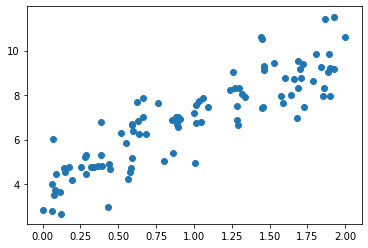

In [4]:
plt.scatter(X,y)

In [5]:
X_b = np.c_[np.ones((100,1)), X]

In [6]:
X_b #add 1 to each instance

array([[1.        , 1.80617907],
       [1.        , 0.06303946],
       [1.        , 0.44275609],
       [1.        , 0.59328489],
       [1.        , 1.78624273],
       [1.        , 0.25549286],
       [1.        , 1.57407778],
       [1.        , 1.30064515],
       [1.        , 1.46428256],
       [1.        , 0.66580093],
       [1.        , 0.59848735],
       [1.        , 0.62648913],
       [1.        , 1.27152423],
       [1.        , 1.99886141],
       [1.        , 1.25636792],
       [1.        , 1.70654819],
       [1.        , 1.6595362 ],
       [1.        , 1.01071268],
       [1.        , 1.29251392],
       [1.        , 1.83844461],
       [1.        , 0.56344065],
       [1.        , 1.72728418],
       [1.        , 0.58852701],
       [1.        , 0.28600921],
       [1.        , 1.88872356],
       [1.        , 0.88262435],
       [1.        , 0.06545823],
       [1.        , 0.17318484],
       [1.        , 0.80229299],
       [1.        , 0.51584406],
       [1.

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #dot 就是 ✖️？

In [8]:
theta_best

array([[3.97124428],
       [2.97648902]])

In [9]:
X_new = np.array([[0], [2]])

In [10]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [11]:
y_predict = X_new_b.dot(theta_best)

In [12]:
y_predict

array([[3.97124428],
       [9.92422232]])

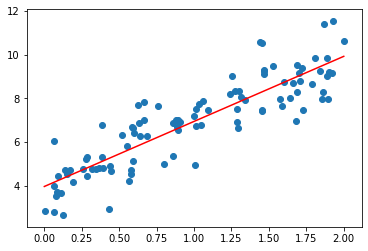

In [13]:
plt.plot(X_new, y_predict, 'r')
plt.scatter(X, y)

### Use sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X, y)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_ #和上面算的一模一样

(array([3.97124428]), array([[2.97648902]]))

In [18]:
lin_reg.predict(X_new)

array([[3.97124428],
       [9.92422232]])

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

In [20]:
theta_best_svd

array([[3.97124428],
       [2.97648902]])

In [21]:
residuals

array([94.25099316])

In [22]:
rank

2

## Gradient Descent

### Batch Gradient Descent

In [23]:
eta = 0.1 #learning rate

In [24]:
n_iterations = 1000

In [25]:
m = 100

In [26]:
theta = np.random.randn(2, 1) #random initialization

In [27]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [28]:
theta #这个approximate很接近啊

array([[3.97124428],
       [2.97648902]])

### Stochastic Gradient Descent

In [29]:
n_epochs = 50

In [30]:
t0, t1 = 5, 50 #learning schedule hyperparameters

In [31]:
def learning_schedule(t):
    return t0/(t + t1)

In [32]:
theta = np.random.randn(2, 1)

In [33]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #因为只有一个instance所以没有除以m，就是除以1就好了
        eta = learning_schedule(epoch * m + i) #learning rate gradually decreases 
        theta = theta - eta * gradients

In [34]:
theta
#a good approximation, but not prefect

array([[3.95066677],
       [2.96830979]])

## Polynomial Regression

In [35]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

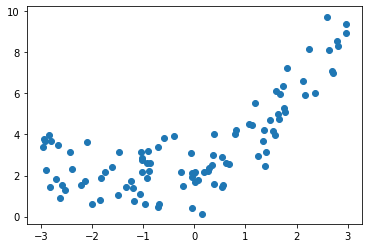

In [36]:
plt.scatter(X, y)

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [39]:
X_poly = poly_features.fit_transform(X)

In [40]:
X[0]

array([0.37752393])

In [41]:
X_poly[0] #PolynomialFeature给原来的X加了一个X^2作为新的feature

array([0.37752393, 0.14252432])

In [42]:
# Then, we are able to fit the data with a Linear regression model

In [43]:
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [45]:
lin_reg.intercept_, lin_reg.coef_

(array([2.24175835]), array([[0.99439407, 0.43202674]]))

In [46]:
y_predict = lin_reg.intercept_ + X_poly.dot(lin_reg.coef_.T)

In [47]:
X_poly.shape

(100, 2)

In [48]:
lin_reg.coef_.shape

(1, 2)

In [49]:
y_predict[0]

array([2.67874022])

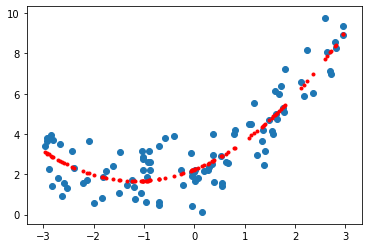

In [51]:
plt.plot(X, y_predict, 'r.')
plt.scatter(X, y)

### Learning curves

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = "val")
    plt.legend()

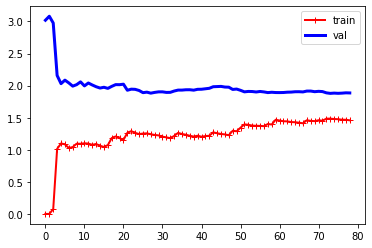

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Take a look at the learning curve of a 10th-degree polynomial model

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression())
])

[0, 80, 0, 3]

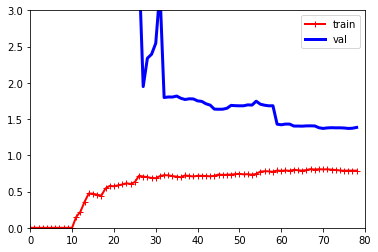

In [57]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])

### Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:
lasso_reg = Lasso(alpha = 0.1)

In [60]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [61]:
lasso_reg.predict([[1.5]])

array([4.76787818])

### Elastic Net

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [64]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [65]:
elastic_net.predict([[1.5]]) #和Lasso差不多呢

array([4.77148256])

### Early Stopping

#### Basic implementation of early stopping

In [67]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [70]:
from sklearn.model_selection import train_test_split

In [76]:
from sklearn.linear_model import SGDRegressor

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [68]:
#prepare the data
poly_scaler = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])


In [74]:
X_train_poly_scaled = poly_scaler.transform(X_train)

In [75]:
X_val_poly_scaled = poly_scaler.transform(X_val)

In [77]:
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant',
                      eta0 = 0.0005)

In [78]:
minimum_val_error = float('inf')
best_epoch = None
best_model = None


In [80]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [82]:
best_model 

# Since we are using warm_start, for each epoch, the model is trained at where it left off, instead of 
# restarting from scratch 

'\nSince we are using warm_start, for each epoch, the model is trained at where it left off, instead of \nrestarting from scratch \n'

## Devision Boundaries

In [1]:
from sklearn import datasets

In [6]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
X = iris['data'][:, 3:] #pedal width

In [7]:
y = (iris['target'] == 2).astype(np.int) #1 if Iris Virginia, else 0

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #linspace就是start = 0, end = 3, 均等间距generate1000个数字
y_proba = log_reg.predict_proba(X_new)

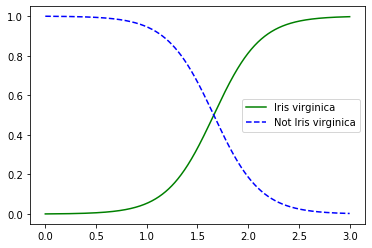

In [17]:
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica') 
plt.legend()
#From the graph, we can see that the decision boundary is about 1.6cm

In [18]:
y_proba #每个category都有一个probability被predict出来 

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [19]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [20]:
X = iris['data'][:, (2,3)] #petal length, petal width
y = iris['target']

In [21]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
# use multinomial such that we are not using default OvR
# specify 'lbfgs', whihc is a solver that supports Softmax Regression

In [22]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [23]:
softmax_reg.predict([[5, 2]])

array([2])

In [24]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])